In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, manifold
from scipy.io import arff

%matplotlib inline

In [2]:
"""
# Too slow for me
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)
"""
# load it from arff file
data = arff.loadarff('mnist_784.arff')
data = np.array(data[0].tolist(), dtype=int)
pixel_values, targets = data[:, :-1], data[:, -1]


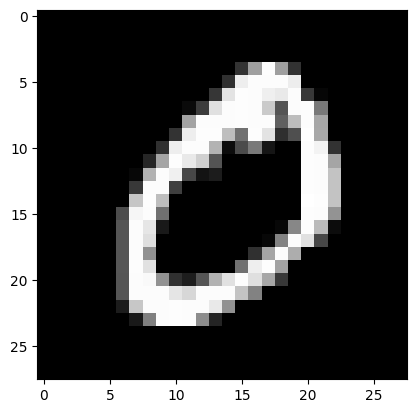

In [3]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [4]:
TSNE = manifold.TSNE(n_components=2, random_state=42)
transformed_data = TSNE.fit_transform(pixel_values[:3000, :])

/home/hjyf/miniconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/hjyf/miniconda3/envs/applied_ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [5]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)

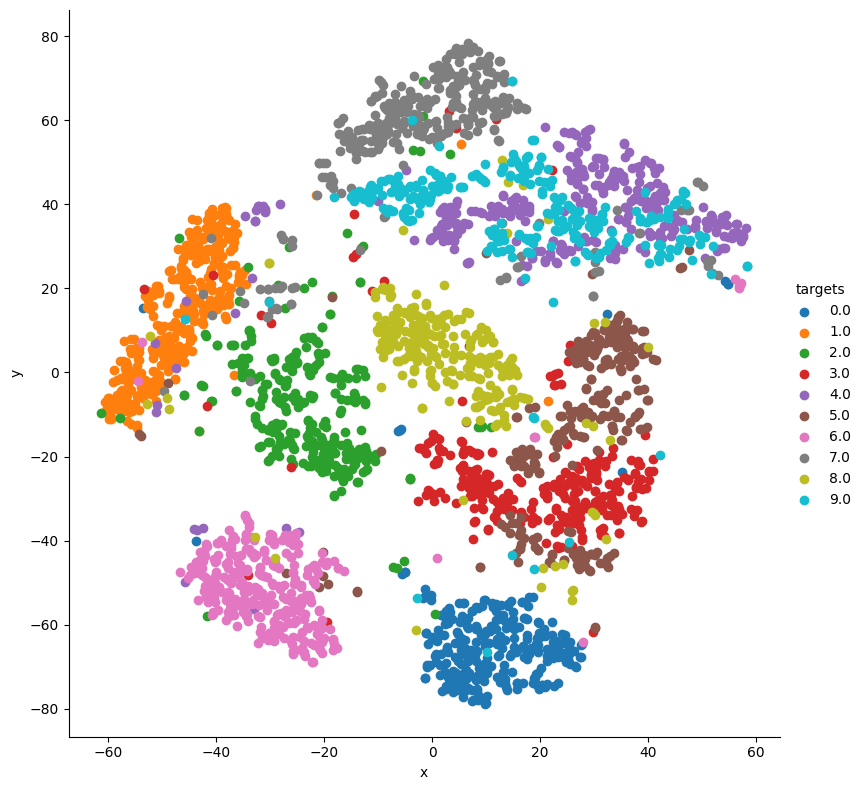

In [6]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

plt.show()